In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/COVID clinical trials.csv')

In [3]:
print(df.head())

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [5]:
print(df.describe())

              Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07


In [6]:
print(df.describe(include='object'))

         NCT Number                                              Title  \
count          5783                                               5783   
unique         5783                                               5775   
top     NCT04680000  Acalabrutinib Study With Best Supportive Care ...   
freq              1                                                  2   

         Acronym      Status         Study Results Conditions  \
count       2480        5783                  5783       5783   
unique      2338          12                     2       3067   
top     COVID-19  Recruiting  No Results Available   COVID-19   
freq          47        2805                  5747        720   

                 Interventions Outcome Measures  \
count                     4897             5748   
unique                    4337             5687   
top     Other: No intervention        Mortality   
freq                        32                5   

                          Sponsor/Collaborators

In [7]:
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


In [8]:
# Percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Results First Posted       99.377486
Study Documents            96.852845
Acronym                    57.115684
Phases                     42.555767
Interventions              15.320768
Locations                  10.115857
Primary Completion Date     0.622514
Completion Date             0.622514
Study Designs               0.605222
Outcome Measures            0.605222
Start Date                  0.587930
Enrollment                  0.587930
Gender                      0.172921
Other IDs                   0.017292
Study Results               0.000000
NCT Number                  0.000000
Rank                        0.000000
Title                       0.000000
Conditions                  0.000000
Sponsor/Collaborators       0.000000
Status                      0.000000
Age                         0.000000
Funded Bys                  0.000000
Study Type                  0.000000
First Posted                0.000000
Last Update Posted          0.000000
URL                         0.000000
d

In [9]:
# Threshold for dropping columns
threshold = 50.0

for col in df.columns:
    missing_ratio = df[col].isnull().mean()

    # Drop if too many missing values
    if missing_ratio > threshold:
        df.drop(columns=[col], inplace=True)
        print(f"Dropped column: {col} (missing {missing_ratio:.2%})")

    else:
        # Fill categorical/text columns
        if df[col].dtype == 'object':
            df[col].fillna('Unknown', inplace=True)
            print(f"Filled missing values in categorical column: {col} with 'Unknown'")

        # Fill numerical columns
        else:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled missing values in numeric column: {col} with median")


Filled missing values in numeric column: Rank with median
Filled missing values in categorical column: NCT Number with 'Unknown'
Filled missing values in categorical column: Title with 'Unknown'
Filled missing values in categorical column: Acronym with 'Unknown'
Filled missing values in categorical column: Status with 'Unknown'
Filled missing values in categorical column: Study Results with 'Unknown'
Filled missing values in categorical column: Conditions with 'Unknown'
Filled missing values in categorical column: Interventions with 'Unknown'
Filled missing values in categorical column: Outcome Measures with 'Unknown'
Filled missing values in categorical column: Sponsor/Collaborators with 'Unknown'
Filled missing values in categorical column: Gender with 'Unknown'
Filled missing values in categorical column: Age with 'Unknown'
Filled missing values in categorical column: Phases with 'Unknown'
Filled missing values in numeric column: Enrollment with median
Filled missing values in categ

/tmp/ipython-input-210340726.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-210340726.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [10]:
print(df.isnull().sum())

Rank                       0
NCT Number                 0
Title                      0
Acronym                    0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Results First Posted       0
Last Update Posted         0
Locations                  0
Study Documents            0
URL                        0
dtype: int64


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

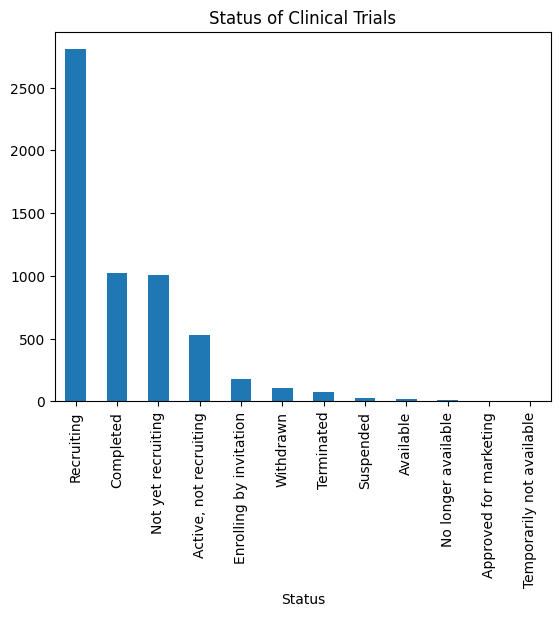

In [11]:
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

Phases
Unknown            2461
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

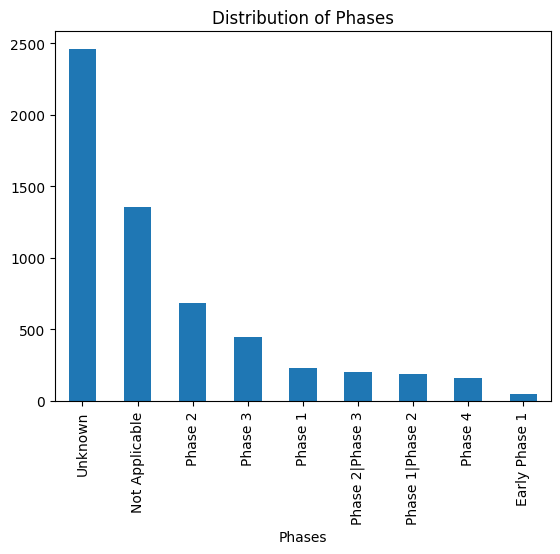

In [12]:
#Phase Distribution
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar',
title='Distribution of Phases')

Age
18 Years and older   (Adult, Older Adult)      2885
Child, Adult, Older Adult                       486
18 Years to 80 Years   (Adult, Older Adult)     221
18 Years to 65 Years   (Adult, Older Adult)     155
18 Years to 75 Years   (Adult, Older Adult)     135
                                               ... 
6 Years to 12 Years   (Child)                     1
15 Years to 19 Years   (Child, Adult)             1
up to 1 Year   (Child)                            1
21 Years to 45 Years   (Adult)                    1
8 Years to 20 Years   (Child, Adult)              1
Name: count, Length: 417, dtype: int64


<Axes: title={'center': 'Age Group Distribution'}, xlabel='Age'>

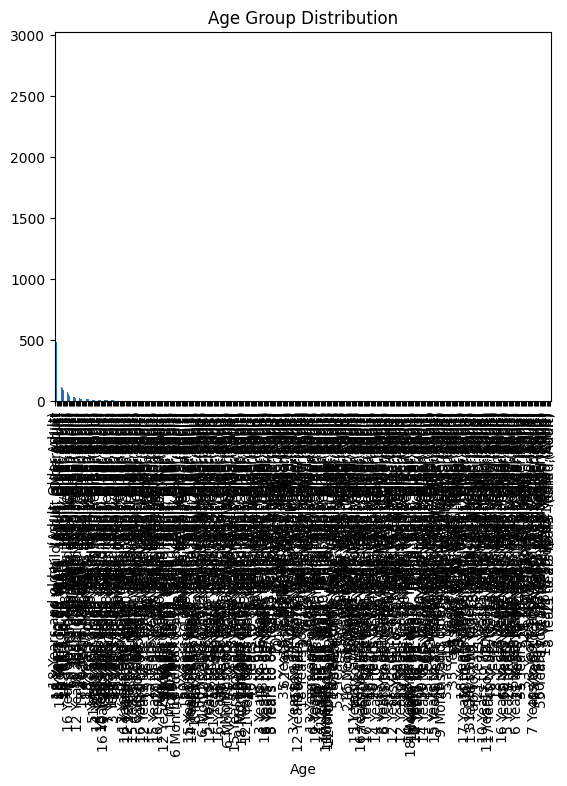

In [13]:
#Age Group Analysis
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='bar', title='Age Group Distribution')

Phases                     Early Phase 1  Not Applicable  Phase 1  \
Status                                                              
Active, not recruiting                 7             111       44   
Approved for marketing                 0               0        0   
Available                              0               0        0   
Completed                              3             226       38   
Enrolling by invitation                4              54        1   
No longer available                    0               0        0   
Not yet recruiting                     5             282       42   
Recruiting                            22             647       98   
Suspended                              2               2        0   
Temporarily not available              0               0        0   
Terminated                             0              13        4   
Withdrawn                              3              19        7   

Phases                     Phase 

<Axes: title={'center': 'Status vs Phases'}, xlabel='Status'>

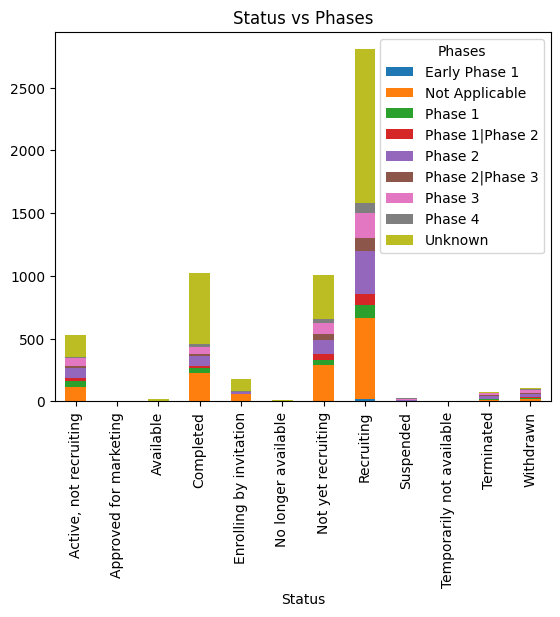

In [14]:
#Bivarate Analysis.....
#Status VS Phase:
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs Phases')

In [15]:
#Conditions vs Outcome Measures.....
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x)).reset_index()
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

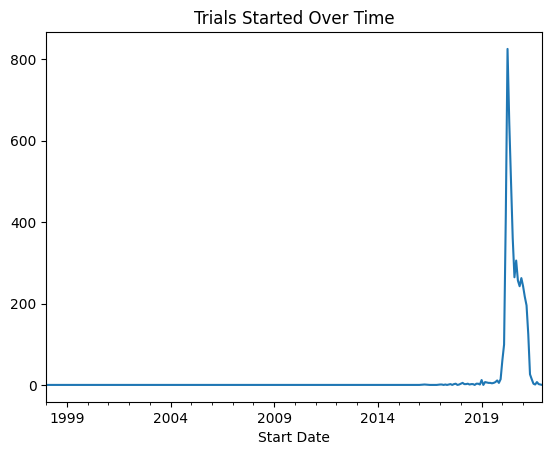

In [16]:
#Time series analysis....
df['Start Date'] = pd.to_datetime(df['Start Date'],errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors = 'coerce')
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Trials Started Over Time')

In [17]:
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()
print(f"Minimum Value: {min_Value} \n\ Maximum value: {max_Value} \n\ Mean is: {mean_Value} \n\ Median is: {median_Value} \n\ Standard Deviation is: {std_Value}")

Minimum Value: 0.0 
\ Maximum value: 20000000.0 
\ Mean is: 18212.782292927546 
\ Median is: 170.0 
\ Standard Deviation is: 403354.93914762075


<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-3314047761.py:6: SyntaxWarning: invalid escape sequence '\ '
  print(f"Minimum Value: {min_Value} \n\ Maximum value: {max_Value} \n\ Mean is: {mean_Value} \n\ Median is: {median_Value} \n\ Standard Deviation is: {std_Value}")
/tmp/ipython-input-3314047761.py:6: SyntaxWarning: invalid escape sequence '\ '
  print(f"Minimum Value: {min_Value} \n\ Maximum value: {max_Value} \n\ Mean is: {mean_Value} \n\ Median is: {median_Value} \n\ Standard Deviation is: {std_Value}")
/tmp/ipython-input-3314047761.py:6: SyntaxWarning: invalid escape sequence '\ '
  print(f"Minimum Value: {min_

In [18]:
df.Enrollment = df.Enrollment.fillna(median_Value)
df.isnull().mean() * 100

,0
Rank,0.000000
NCT Number,0.000000
Title,0.000000
Acronym,0.000000
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,0.000000
Outcome Measures,0.000000
Sponsor/Collaborators,0.000000


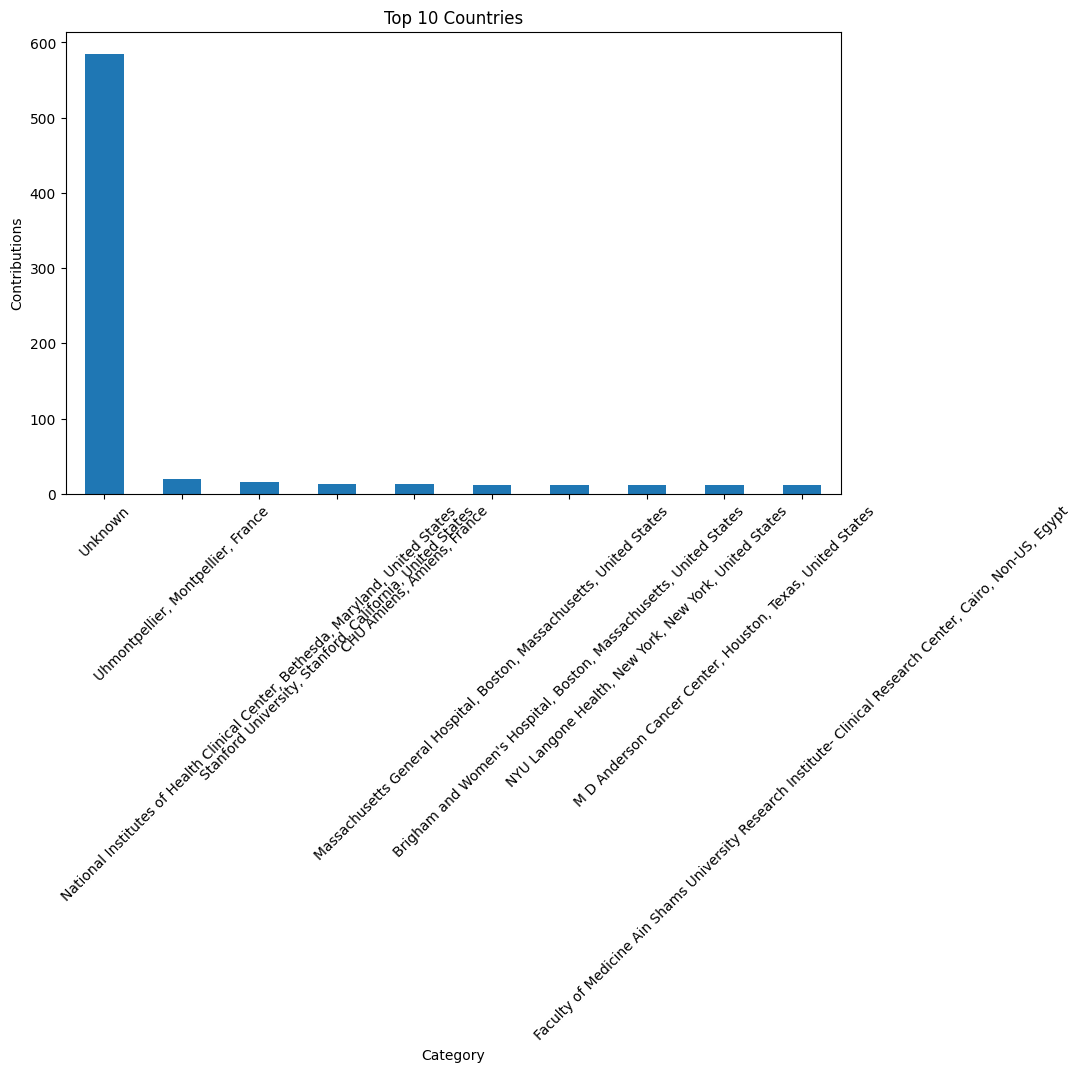

In [19]:
def visualize_data(series, caption="", ylabel=""):
    plt.figure(figsize=(10,6))
    series.plot(kind='bar')
    plt.title(caption)
    plt.xlabel('Category')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

top_10_Countires = df.Locations.value_counts()[:10]
visualize_data(top_10_Countires , caption = 'Top 10 Countries', ylabel = 'Contributions')

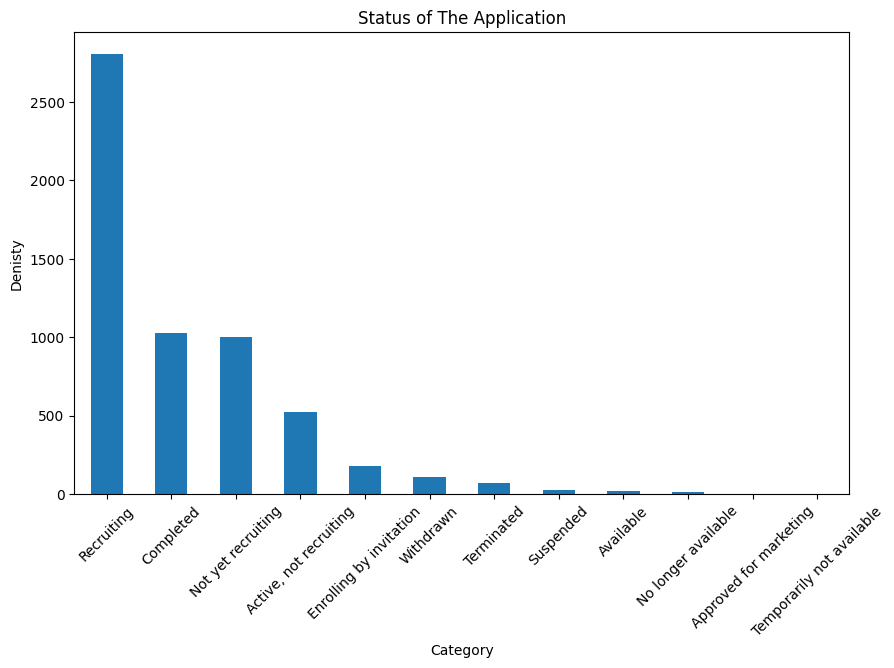

In [20]:
status = df.Status.value_counts()
visualize_data(status , caption = 'Status of The Application' ,ylabel = 'Denisty')

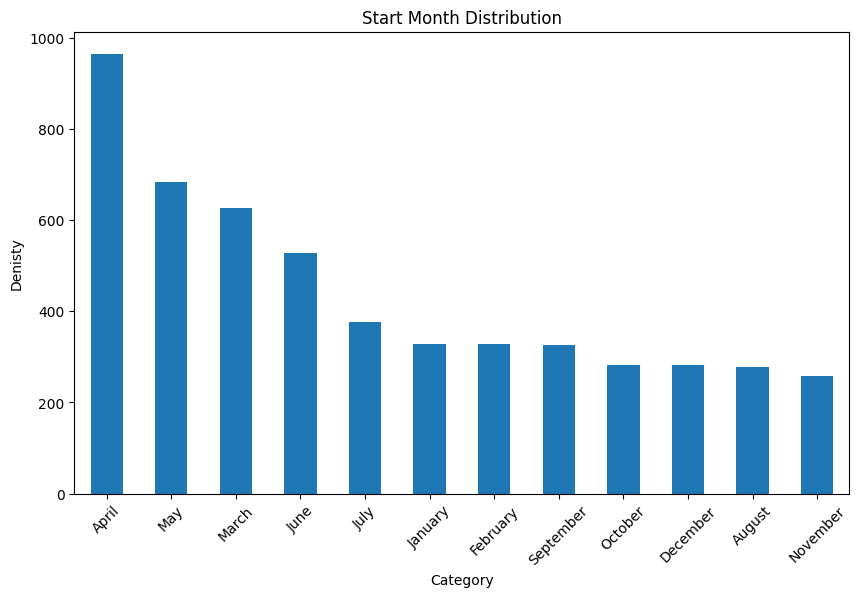

In [21]:
def visualize_data(series, caption="", ylabel=""):
    plt.figure(figsize=(10,6))
    series.plot(kind='bar')
    plt.title(caption)
    plt.xlabel('Category')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

start_month = df['Start Date'].dt.month_name()
start_month_Distribution = start_month.value_counts()
visualize_data(start_month_Distribution , caption = 'Start Month Distribution' , ylabel = 'Denisty')

In [22]:
print(f"The shape of data frame is {df.shape}")
print(f"Nunique in NCT Number is {df['NCT Number'].nunique()}")
print(f"Nunique in URL is {df.URL.nunique()}")

The shape of data frame is (5783, 27)
Nunique in NCT Number is 5783
Nunique in URL is 5783
